In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

from tensorflow.keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dropout, BatchNormalization, LSTM, Bidirectional, Dense, Dropout
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [4]:
# Load the dataset
data = pd.read_csv('Acoustic Features.csv')

In [5]:
data.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


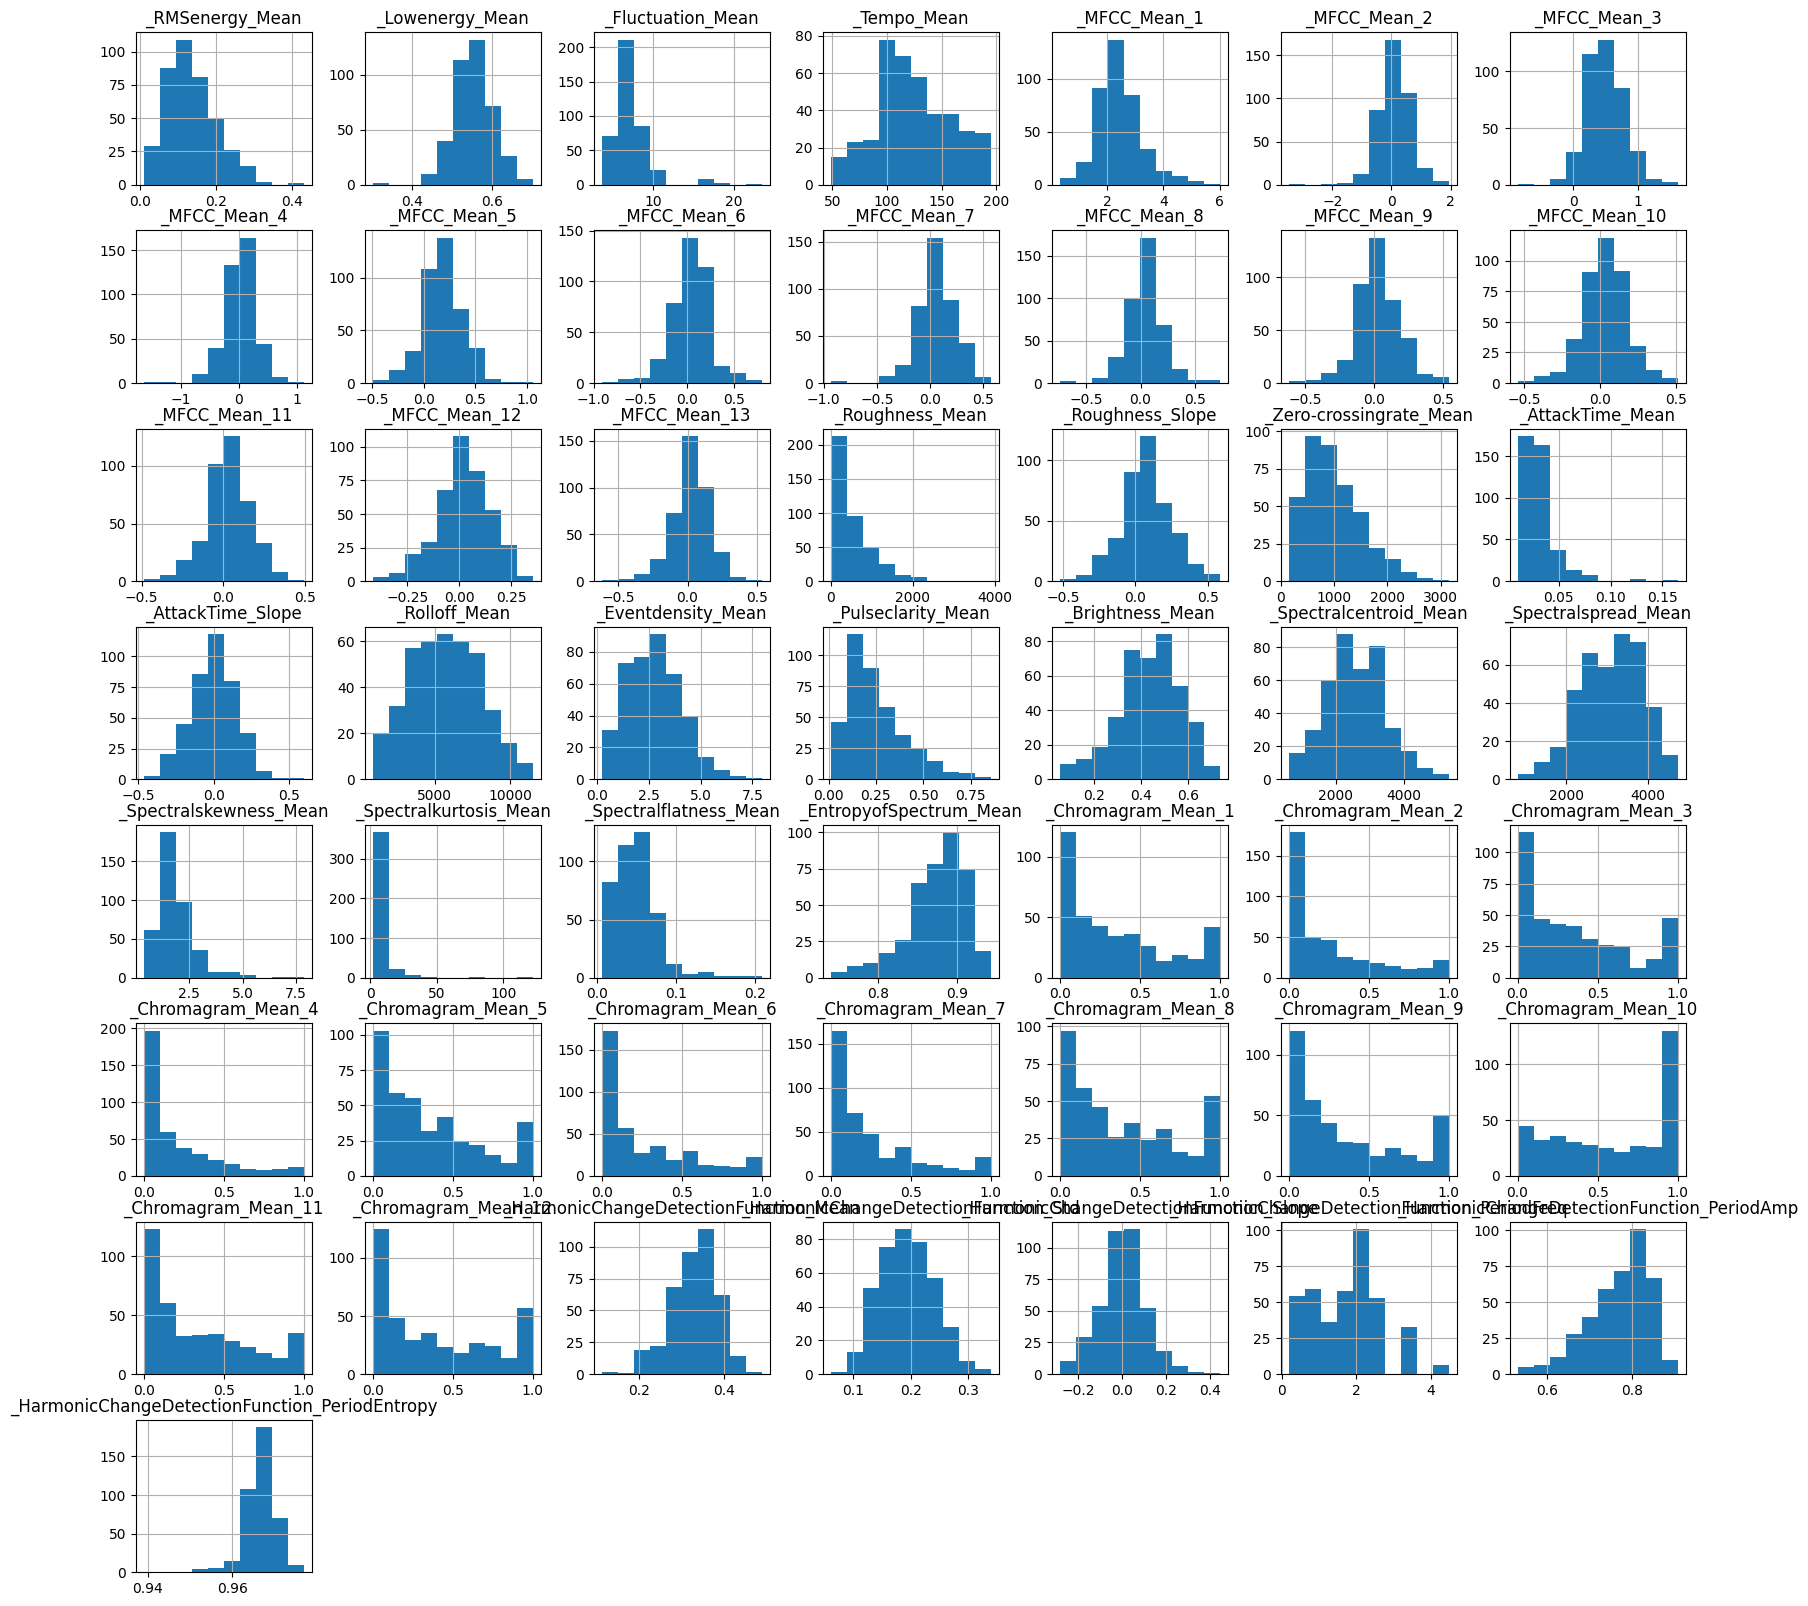

In [6]:
data.hist(figsize=(20,20))
plt.show()

In [7]:
# Preprocessing
# Separate features and labels
X = data.drop(columns=["Class"]).values  # Input features
y = data["Class"].values  # Labels

In [8]:
print(y[2])

relax


In [9]:
# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [10]:
print(len(y_encoded))
print(y_encoded)

400
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# One-hot encode labels
y_onehot = np.zeros((y_encoded.size, y_encoded.max() + 1))
y_onehot[np.arange(y_encoded.size), y_encoded] = 1

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y_onehot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
print('data :')
print(data.shape)
print(X_normalized.shape)
print(y_onehot.shape)
print('----------------')
print('X-y train data :')
print(X_train.shape)
print(y_train.shape)
print('----------------')
print('X test-val data :')
print(X_val.shape)
print(X_test.shape)
print('----------------')
print('y test-val data :')
print(y_val.shape)
print(y_test.shape)
print('----------------')
print(X_temp.shape)
print(y_temp.shape)

data :
(400, 51)
(400, 50)
(400, 4)
----------------
X-y train data :
(280, 50)
(280, 4)
----------------
X test-val data :
(60, 50)
(60, 50)
----------------
y test-val data :
(60, 4)
(60, 4)
----------------
(120, 50)
(120, 4)


# Basic CNN Model

In [13]:
# Build the CNN model
cnn_model_1 = Sequential([
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='relu'),
    Dropout(0.4),
    Flatten(input_shape=(50, 1), name='flatten_input'),
    Dense(4, activation='softmax')  # Output layer with 4 classes
])

# Compile the model
cnn_model_1.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_input (Flatten)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = cnn_model_1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 417ms/step - accuracy: 0.2308 - loss: 1.3863 - val_accuracy: 0.1833 - val_loss: 1.3868
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2291 - loss: 1.3864 - val_accuracy: 0.1833 - val_loss: 1.3870
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2823 - loss: 1.3859 - val_accuracy: 0.1833 - val_loss: 1.3873
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2405 - loss: 1.3860 - val_accuracy: 0.1833 - val_loss: 1.3876
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2846 - loss: 1.3857 - val_accuracy: 0.1833 - val_loss: 1.3879
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2476 - loss: 1.3864 - val_accuracy: 0.1833 - val_loss: 1.3882
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2597 - loss: 1.3859 - val_accuracy: 0.1833 - val_loss: 1.3885
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2688 - loss: 1.3851 - val_accuracy: 0.1833 - val_loss:

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model_1.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")

Test Accuracy: 23.33 %


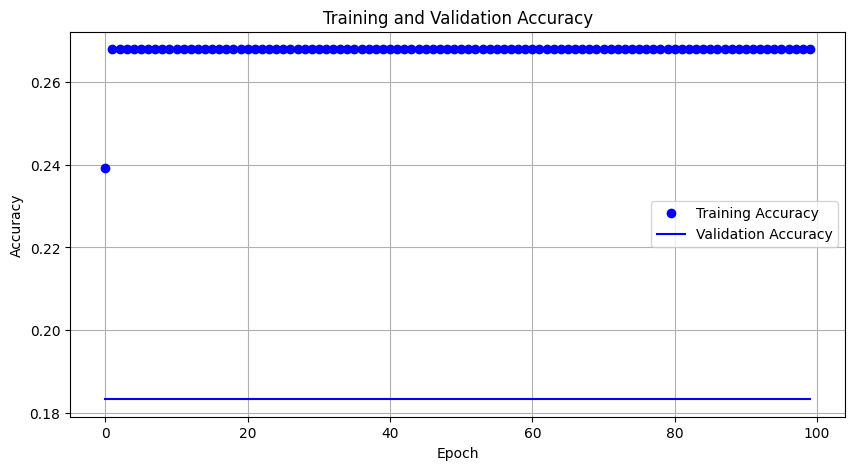

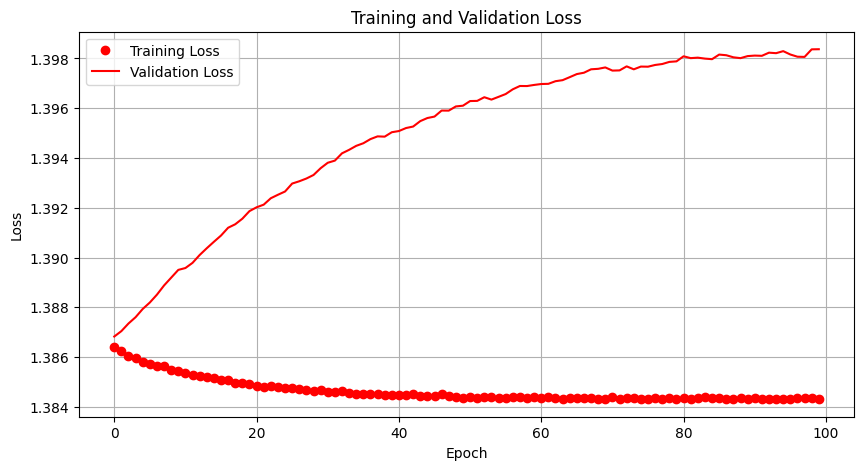

In [16]:

# Plotting the training history

# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline

# Get training history data
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']  # Use 'val_accuracy' instead of 'val_acc'
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))  # Use 'accuracy' for consistency

# Plot Accuracy
plt.figure(figsize=(10, 5))  # Optional: Adjust figure size
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Optional: Add grid lines

# Plot Loss
plt.figure(figsize=(10, 5))  # Optional: Adjust figure size
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Optional: Add grid lines

plt.show()

# CNN model using Conv1D

In [17]:
#using conv1D
# Reshape the data for Conv1D
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
print(X_train_cnn.shape)
print(X_val_cnn.shape)
print(X_test_cnn.shape)

(280, 50, 1)
(60, 50, 1)
(60, 50, 1)


In [19]:
X_test_cnn

array([[[-1.23896261e+00],
        [ 2.41476073e+00],
        [-6.93509845e-02],
        ...,
        [-1.04423097e+00],
        [-1.60642694e+00],
        [-7.22310796e+00]],

       [[-5.07873562e-01],
        [ 1.17181840e+00],
        [-4.60777369e-02],
        ...,
        [ 1.71883838e-01],
        [ 3.65330563e-01],
        [ 3.35579666e-01]],

       [[ 5.44428014e-03],
        [-1.59027565e+00],
        [ 1.32221358e+00],
        ...,
        [-4.48011854e-01],
        [ 2.12588784e-01],
        [ 5.96224067e-01]],

       ...,

       [[-5.07873562e-01],
        [-4.26250300e-01],
        [-5.27790051e-01],
        ...,
        [-1.45749477e+00],
        [-1.42591393e+00],
        [-1.85709136e-01]],

       [[ 3.65544524e-02],
        [-8.60293652e-01],
        [ 2.27492702e-01],
        ...,
        [-8.64060336e-02],
        [-1.49534201e+00],
        [-2.27086434e+00]],

       [[-3.83432873e-01],
        [ 1.34938159e+00],
        [ 3.14877160e-01],
        ...,
        

In [20]:
# Build the CNN model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(50, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(4, activation='softmax')  # Output layer with 4 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [22]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 48, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 22, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          90,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,092 (379.27 KB)

 Trainable params: 97,092 (379.27 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train the model
history = cnn_model.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=45,
    batch_size=32,
    verbose=1
)

Epoch 1/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 472ms/step - accuracy: 0.2802 - loss: 1.4445 - val_accuracy: 0.5000 - val_loss: 1.2413
Epoch 2/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3250 - loss: 1.3319 - val_accuracy: 0.6667 - val_loss: 1.1443
Epoch 3/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5607 - loss: 1.1303 - val_accuracy: 0.6500 - val_loss: 1.0148
Epoch 4/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6630 - loss: 0.9810 - val_accuracy: 0.6333 - val_loss: 0.8900
Epoch 5/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5992 - loss: 0.9546 - val_accuracy: 0.7000 - val_loss: 0.8033
Epoch 6/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6257 - loss: 0.8491 - val_accuracy: 0.6333 - val_loss: 0.8156
Epoch 7/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6808 - loss: 0.7730 - val_accuracy: 0.6833 - val_loss: 0.7397
Epoch 8/45
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6565 - loss: 0.8035 - val_accuracy: 0.6000 - val_loss: 0.7839
Ep

In [24]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")

Test Accuracy: 75.00 %


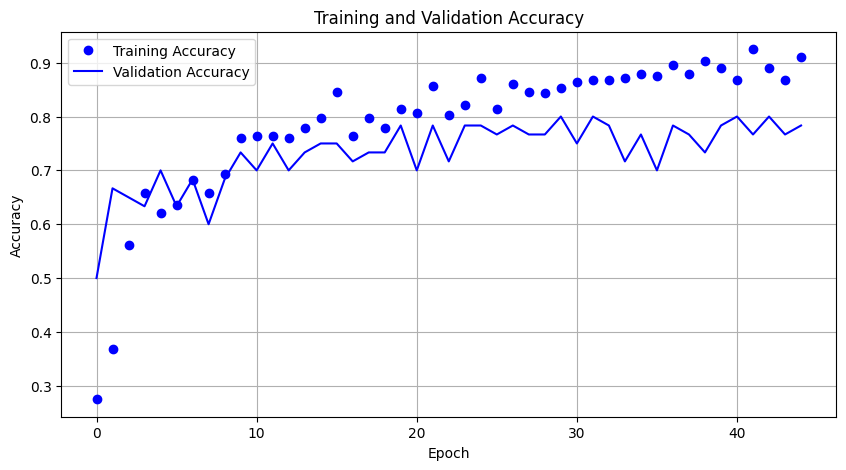

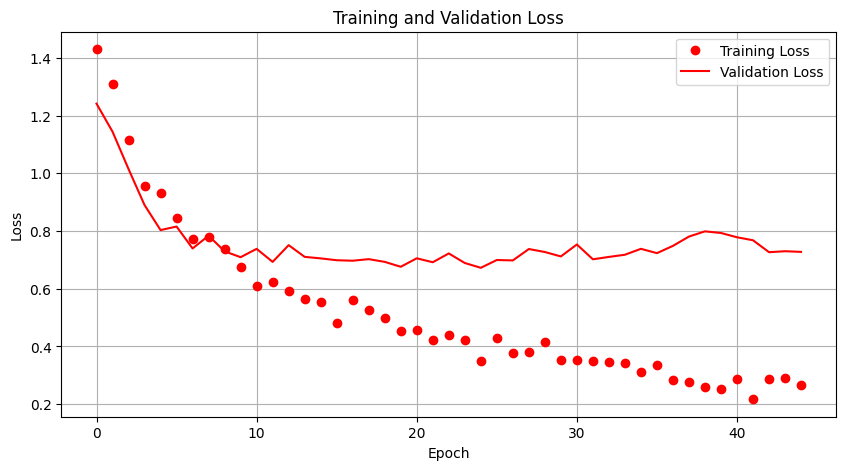

In [25]:

# Plotting the training history

# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline

# Get training history data
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']  # Use 'val_accuracy' instead of 'val_acc'
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))  # Use 'accuracy' for consistency

# Plot Accuracy
plt.figure(figsize=(10, 5))  # Optional: Adjust figure size
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Optional: Add grid lines

# Plot Loss
plt.figure(figsize=(10, 5))  # Optional: Adjust figure size
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Optional: Add grid lines

plt.show()

In [26]:
# Save the model
cnn_model.save('music_emotion_recognition_model_cnn_conv1d.h5')

# CNN model using Conv2D

In [27]:
# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [28]:
# One-hot encode labels
y_onehot = np.zeros((y_encoded.size, y_encoded.max() + 1))
y_onehot[np.arange(y_encoded.size), y_encoded] = 1

In [29]:
# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y_onehot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [30]:
# Reshape the data for Conv2D
# Reshape into a 2D grid format (e.g., 5x10 or 10x5 matrix depending on logical grouping)
X_train_cnn = X_train.reshape(X_train.shape[0], 10, 5, 1)
X_val_cnn = X_val.reshape(X_val.shape[0], 10, 5, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 10, 5, 1)

In [31]:
cnn_model_2d = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(10, 5, 1), padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    # BatchNormalization(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    # BatchNormalization(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.3),

    Flatten(),

    Dense(128, activation='relu'),
    # BatchNormalization(),
    Dropout(0.4),

    Dense(4, activation='softmax')  # Output layer with 4 classes

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compile the model
cnn_model_2d.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [33]:
# Train the model
history = cnn_model_2d.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 603ms/step - accuracy: 0.2098 - loss: 1.4007 - val_accuracy: 0.3167 - val_loss: 1.3814
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3062 - loss: 1.3821 - val_accuracy: 0.3500 - val_loss: 1.3738
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3364 - loss: 1.3683 - val_accuracy: 0.3500 - val_loss: 1.3389
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3547 - loss: 1.3436 - val_accuracy: 0.3500 - val_loss: 1.2785
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3416 - loss: 1.3063 - val_accuracy: 0.4333 - val_loss: 1.1834
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4301 - loss: 1.2347 - val_accuracy: 0.4167 - val_loss: 1.1778
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3880 - loss: 1.2426 - val_accuracy: 0.4167 - val_loss: 1.1095
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4649 - loss: 1.1661 - val_accuracy: 0.4500 - val_loss: 1.064

In [34]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model_2d.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")

Test Accuracy: 56.67 %


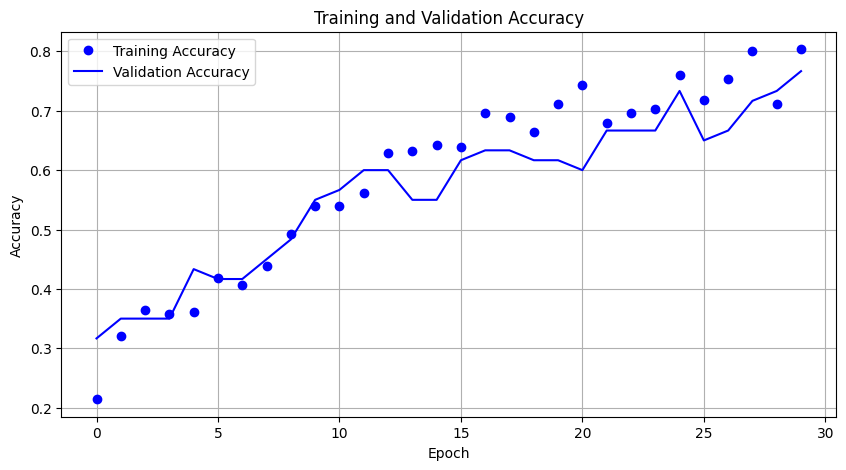

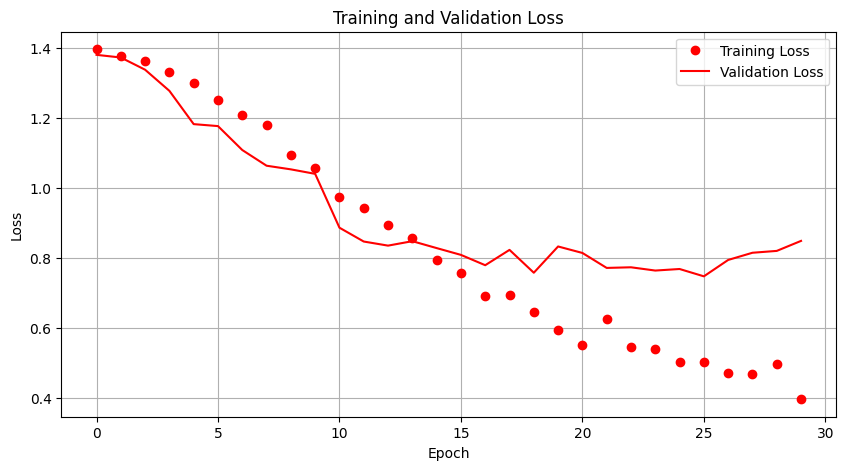

In [35]:

# Plotting the training history

# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline

# Get training history data
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']  # Use 'val_accuracy' instead of 'val_acc'
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))  # Use 'accuracy' for consistency

# Plot Accuracy
plt.figure(figsize=(10, 5))  # Optional: Adjust figure size
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Optional: Add grid lines

# Plot Loss
plt.figure(figsize=(10, 5))  # Optional: Adjust figure size
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Optional: Add grid lines

plt.show()

In [36]:
# cnn_model.save('music_emotion_recognition_model_cnn_conv2d.h5')

# Using XGBoost

In [37]:
# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# One-hot encode labels
y_onehot = np.zeros((y_encoded.size, y_encoded.max() + 1))
y_onehot[np.arange(y_encoded.size), y_encoded] = 1

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y_onehot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [38]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=4,               # Number of classes
    eval_metric='mlogloss',    # Evaluation metric
    use_label_encoder=False,   # For compatibility with sklearn
    random_state=42
)

In [39]:

# Convert y_train to integer labels
y_train_int = np.argmax(y_train, axis=1)

# Convert y_val to integer labels (for evaluation)
y_val_int = np.argmax(y_val, axis=1)

# ... (rest of your code) ...

# Train the model using integer labels
xgb_model.fit(X_train, y_train_int, eval_set=[(X_val, y_val_int)], verbose=True)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Convert y_test to integer labels (if it's in one-hot encoded format)
y_test_int = np.argmax(y_test, axis=1)  # Only if y_test is one-hot encoded

# Evaluate the model
test_accuracy = accuracy_score(y_test_int, y_pred)  # Use y_test_int
print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_int, y_pred, target_names=label_encoder.classes_))  # Use y_test_int


[0]	validation_0-mlogloss:1.13607
[1]	validation_0-mlogloss:0.97300


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:41:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation_0-mlogloss:0.88224
[3]	validation_0-mlogloss:0.80575
[4]	validation_0-mlogloss:0.75289
[5]	validation_0-mlogloss:0.70063
[6]	validation_0-mlogloss:0.67391
[7]	validation_0-mlogloss:0.63470
[8]	validation_0-mlogloss:0.61556
[9]	validation_0-mlogloss:0.58792
[10]	validation_0-mlogloss:0.57396
[11]	validation_0-mlogloss:0.55670
[12]	validation_0-mlogloss:0.55101
[13]	validation_0-mlogloss:0.52876
[14]	validation_0-mlogloss:0.52244
[15]	validation_0-mlogloss:0.52114
[16]	validation_0-mlogloss:0.50865
[17]	validation_0-mlogloss:0.50868
[18]	validation_0-mlogloss:0.50566
[19]	validation_0-mlogloss:0.50237
[20]	validation_0-mlogloss:0.50736
[21]	validation_0-mlogloss:0.50041
[22]	validation_0-mlogloss:0.49800
[23]	validation_0-mlogloss:0.50088
[24]	validation_0-mlogloss:0.49411
[25]	validation_0-mlogloss:0.49104
[26]	validation_0-mlogloss:0.49008
[27]	validation_0-mlogloss:0.48630
[28]	validation_0-mlogloss:0.48331
[29]	validation_0-mlogloss:0.48469
[30]	validation_0-mlogloss:0

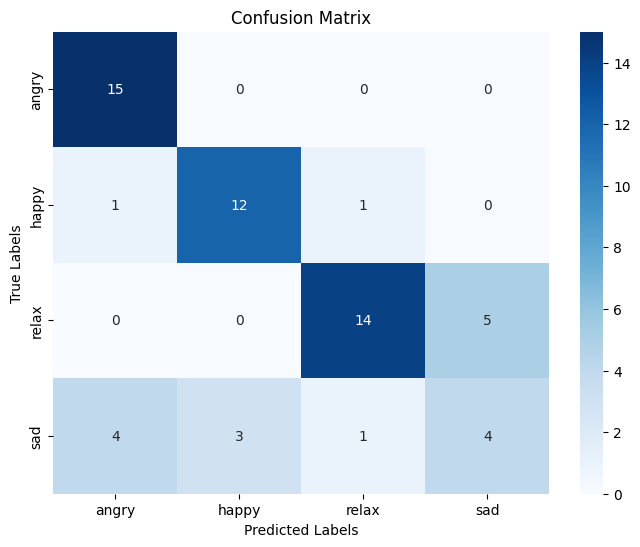

In [40]:

conf_matrix = confusion_matrix(y_test_int, y_pred)  # Assuming y_test_int is the integer-encoded y_test

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [41]:
# # Train the model
# xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)


In [42]:
# # Predict on the test set
# y_pred = xgb_model.predict(X_test)

In [43]:
# # Evaluate the model
# test_accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {test_accuracy:.2f}")
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [44]:
# # Plot confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.title('Confusion Matrix')
# plt.ylabel('True Labels')
# plt.xlabel('Predicted Labels')
# plt.show()

In [45]:
xgb_model.save_model('music_emotion_recognition_model_xgboost.json')

# Hyperparameter Tuning with GridSearchCV

Hyperparameter tuning helps find the best combination of parameters for optimal performance. We use GridSearchCV for an exhaustive search over parameter combinations.

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# # Define hyperparameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [50, 100, 200],
#     'subsample': [0.8, 1.0]
# }

In [48]:
# # Initialize XGBoost model
# xgb_model = XGBClassifier(
#     objective='multi:softmax',
#     num_class=4,
#     eval_metric='mlogloss',
#     use_label_encoder=False,
#     random_state=42
# )

In [49]:

# # Use GridSearchCV for tuning
# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=3,  # 3-fold cross-validation
#     verbose=2,
#     n_jobs=-1
# )

In [50]:
# # Perform grid search
# grid_search.fit(X_train, y_train)

In [51]:

# # Print best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

In [52]:
# # Use the best estimator
# best_xgb_model = grid_search.best_estimator_

# # Evaluate on the test set
# y_pred = best_xgb_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy with Best Parameters: {test_accuracy:.2f}")

# Feature Importance Analysis

XGBoost provides a feature importance score for each feature. You can visualize these scores to understand which features contribute the most to the model’s predictions.

In [53]:
# import matplotlib.pyplot as plt
# import xgboost as xgb

# # Plot feature importance
# xgb.plot_importance(best_xgb_model, max_num_features=10, importance_type='weight', title='Top 10 Feature Importances')
# plt.show()

# Ensemble learning
Ensemble learning combines the predictions of multiple models to improve performance. For your dataset, common ensemble methods include Bagging, Boosting, and Stacking.



*   Bagging (Random Forest):
  * Combines multiple decision trees trained on different data subsets (via bootstrap sampling).
  * Handles overfitting better in noisy datasets.
  * Works well with uncorrelated features.

*   Boosting (Gradient Boosting):
  * Sequentially trains models to correct errors made by previous models.
  * Improves performance by focusing on misclassified samples.
  * Prone to overfitting with many iterations but performs well with proper regularization.

* Stacking:
  * Combines predictions from multiple base models using a meta-model.
  * Leverages the strengths of multiple models by combining their predictions.
  * Typically outperforms individual models if the base models are diverse.

* Output
  * Accuracy Comparison: Displays the accuracy of each ensemble method.

  * Confusion Matrix for Stacking: Visualizes how well the stacking model performs across all classes.

  * Classification Report: Provides precision, recall, and F1-score for the stacking model

---

Here's an updated Stacking Ensemble implementation that includes CNN model and XGBoost model alongside Random Forest and Gradient Boosting. **We'll use the CNN as one of the base models by extracting its predictions, and combine it with XGBoost and other models in the stacking ensemble.**

* CNN Integration:
  * A wrapper class CNNWrapper makes the CNN model compatible with the StackingClassifier.
  * The CNN predictions are extracted as features and combined with other models.

* Other Base Models:
  * XGBoost, Random Forest, and Gradient Boosting are used directly in the stacking ensemble.
  * The meta-classifier is a logistic regression model.

* Predictions:
  * All base models predict the test set, and their outputs are combined by the stacking ensemble.


In [54]:
# CNN Model (pre-trained)
# Assuming you've already trained the CNN and saved it to a file, e.g., 'cnn_model.h5'
cnn_model = load_model('music_emotion_recognition_model_cnn_conv1d.h5')

In [55]:
# Extract CNN Predictions as Features
def get_cnn_predictions(cnn_model, X_data):
    """Extract predictions from the CNN model."""
    X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], 1)  # Ensure the shape matches CNN input
    cnn_predictions = cnn_model.predict(X_data, verbose=0)
    return np.argmax(cnn_predictions, axis=1)

In [56]:
# # XGBoost Model
# xgb_model = XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)
# xgb_model.fit(X_train, y_train)

In [57]:
# Train the model using integer labels
xgb_model.fit(X_train, y_train_int, eval_set=[(X_val, y_val_int)], verbose=True)

[0]	validation_0-mlogloss:1.13607
[1]	validation_0-mlogloss:0.97300
[2]	validation_0-mlogloss:0.88224
[3]	validation_0-mlogloss:0.80575
[4]	validation_0-mlogloss:0.75289


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:41:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	validation_0-mlogloss:0.70063
[6]	validation_0-mlogloss:0.67391
[7]	validation_0-mlogloss:0.63470
[8]	validation_0-mlogloss:0.61556
[9]	validation_0-mlogloss:0.58792
[10]	validation_0-mlogloss:0.57396
[11]	validation_0-mlogloss:0.55670
[12]	validation_0-mlogloss:0.55101
[13]	validation_0-mlogloss:0.52876
[14]	validation_0-mlogloss:0.52244
[15]	validation_0-mlogloss:0.52114
[16]	validation_0-mlogloss:0.50865
[17]	validation_0-mlogloss:0.50868
[18]	validation_0-mlogloss:0.50566
[19]	validation_0-mlogloss:0.50237
[20]	validation_0-mlogloss:0.50736
[21]	validation_0-mlogloss:0.50041
[22]	validation_0-mlogloss:0.49800
[23]	validation_0-mlogloss:0.50088
[24]	validation_0-mlogloss:0.49411
[25]	validation_0-mlogloss:0.49104
[26]	validation_0-mlogloss:0.49008
[27]	validation_0-mlogloss:0.48630
[28]	validation_0-mlogloss:0.48331
[29]	validation_0-mlogloss:0.48469
[30]	validation_0-mlogloss:0.48504
[31]	validation_0-mlogloss:0.48394
[32]	validation_0-mlogloss:0.48351
[33]	validation_0-mloglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)

In [58]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Gradient Boosting Model
y_train_1d = np.argmax(y_train, axis=1)  # Convert to 1D
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train_1d)

GradientBoostingClassifier(random_state=42)

In [60]:
# Stacking Ensemble with CNN, XGBoost, Random Forest, and Gradient Boosting
class CNNWrapper:
    """Wrapper to use CNN predictions in stacking."""
    def __init__(self, cnn_model):
        self.cnn_model = cnn_model

    def fit(self, X, y=None):
        # No fitting needed for pre-trained CNN
        return self

    def predict(self, X):
        return get_cnn_predictions(self.cnn_model, X)

    def get_params(self, deep=True):
        # Required for scikit-learn compatibility
        return {'cnn_model': self.cnn_model}

    def set_params(self, **params):
        # Required for scikit-learn compatibility
        for key, value in params.items():
            setattr(self, key, value)
        return self

In [61]:
cnn_wrapper = CNNWrapper(cnn_model)

estimators = [
    ('cnn', cnn_wrapper),
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('gb', gb_model)
]

y_train_1d = np.argmax(y_train, axis=1)  # Convert to 1D

# Meta-classifier: Logistic Regression
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

stack_model.fit(X_train, y_train_1d)  # Use y_train_1d

# Evaluate Stacking Ensemble
y_pred_stack = stack_model.predict(X_test)

# Convert y_test to integer labels if it's one-hot encoded
y_test_int = np.argmax(y_test, axis=1)  # Only if y_test is one-hot encoded

acc_stack = accuracy_score(y_test_int, y_pred_stack)  # Use y_test_int

# Results
print(f"Stacking Ensemble Accuracy: {acc_stack * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:41:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:41:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-p

Stacking Ensemble Accuracy: 76.67%


# LSTM With PCA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.3769 - loss: 1.3851 - val_accuracy: 0.4375 - val_loss: 1.3814
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5045 - loss: 1.3764 - val_accuracy: 0.4875 - val_loss: 1.3604
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5079 - loss: 1.3462 - val_accuracy: 0.4375 - val_loss: 1.2675
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5688 - loss: 1.2212 - val_accuracy: 0.4375 - val_loss: 1.1541
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5670 - loss: 1.0948 - val_accuracy: 0.4750 - val_loss: 1.0752
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7206 - loss: 0.9613 - val_accuracy: 0.5250 - val_loss: 0.9947
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7083 - loss: 0.8578 - val_accuracy: 0.5250 - val_loss: 0.9120
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7701 - loss: 0.7853 - val_accuracy: 0.5250 - v

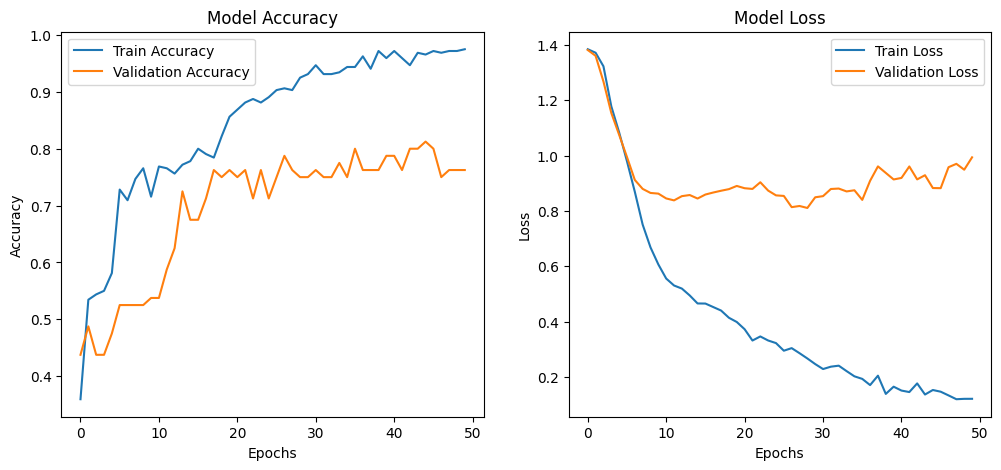

In [62]:
from sklearn.decomposition import PCA

# Extract features and labels
X = data.iloc[:, 1:].values  # All columns except 'Class'
y = data.iloc[:, 0].values  # 'Class' column

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for feature selection
pca = PCA(n_components=20)  # Selecting top 20 principal components
X_pca = pca.fit_transform(X_scaled)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_one_hot, test_size=0.2, random_state=42)

# Reshape input to 3D (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define model architecture
def build_model(input_shape, num_classes=5):
    model = Sequential()

    # First Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.3))

    # Second Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.3))

    # LSTM layer with 32 nodes
    model.add(LSTM(32, return_sequences=True))
    model.add(Dropout(0.3))

    # LSTM layer with 16 nodes
    model.add(LSTM(16))
    model.add(Dropout(0.3))

    # Output layer with softmax activation
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Build and compile model
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_model(input_shape, num_classes=y_one_hot.shape[1])
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
eval_results = model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]:.4f}, Test Accuracy: {eval_results[1]:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()
